<a href="https://colab.research.google.com/github/HinePo/Kaggle-Competition---Titanic-Classification/blob/main/KC_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

In [ ]:
# Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

# utils
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_original = pd.read_csv('/content/train.csv')
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_original.shape

(891, 12)

In [ ]:
df_original.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploring some columns

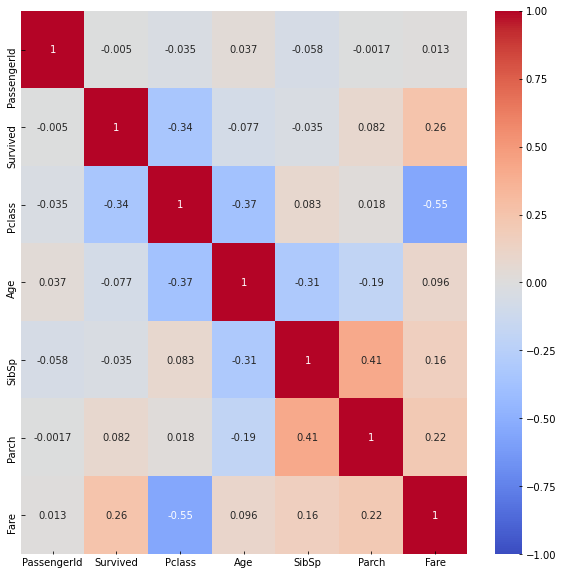

In [ ]:
corr = df_original.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
# # SibSp and Survived: no apparent relation
# SibSp: Number of siblings / spouses aboard the Titanic
df_original.groupby(['SibSp', 'Survived']).count()

PassengerId  Pclass  Name  Sex  ...  Ticket  Fare  Cabin  Embarked
SibSp Survived                                  ...                               
0     0                 398     398   398  398  ...     398   398     49       398
      1                 210     210   210  210  ...     210   210     77       208
1     0                  97      97    97   97  ...      97    97     17        97
      1                 112     112   112  112  ...     112   112     52       112
2     0                  15      15    15   15  ...      15    15      1        15
      1                  13      13    13   13  ...      13    13      5        13
3     0                  12      12    12   12  ...      12    12      1        12
      1                   4       4     4    4  ...       4     4      2         4
4     0                  15      15    15   15  ...      15    15      0        15
      1                   3       3     3    3  ...       3     3      0         3
5     0                   5       5     5    5  ...       5     5      0         5
8     0                   7       7     7    7  ...       7     7      0         7

[12 rows x 10 columns]

In [ ]:
# Parch and Survived: no apparent relation
# Parch: Number of parents / children aboard the Titanic
df_original.groupby(['Parch', 'Survived']).count()

PassengerId  Pclass  Name  Sex  ...  Ticket  Fare  Cabin  Embarked
Parch Survived                                  ...                               
0     0                 445     445   445  445  ...     445   445     50       445
      1                 233     233   233  233  ...     233   233     91       231
1     0                  53      53    53   53  ...      53    53     11        53
      1                  65      65    65   65  ...      65    65     28        65
2     0                  40      40    40   40  ...      40    40      6        40
      1                  40      40    40   40  ...      40    40     17        40
3     0                   2       2     2    2  ...       2     2      0         2
      1                   3       3     3    3  ...       3     3      0         3
4     0                   4       4     4    4  ...       4     4      1         4
5     0                   4       4     4    4  ...       4     4      0         4
      1                   1       1     1    1  ...       1     1      0         1
6     0                   1       1     1    1  ...       1     1      0         1

[12 rows x 10 columns]

In [ ]:
# Ticket and Survived: no apparent relation
# Ticket number/code
df_original.groupby(['Ticket', 'Survived']).count()

PassengerId  Pclass  Name  ...  Fare  Cabin  Embarked
Ticket      Survived                             ...                       
110152      1                   3       3     3  ...     3      3         3
110413      0                   1       1     1  ...     1      1         1
            1                   2       2     2  ...     2      2         2
110465      0                   2       2     2  ...     2      2         2
110564      1                   1       1     1  ...     1      1         1
...                           ...     ...   ...  ...   ...    ...       ...
W./C. 6609  0                   1       1     1  ...     1      0         1
W.E.P. 5734 0                   1       1     1  ...     1      1         1
W/C 14208   0                   1       1     1  ...     1      0         1
WE/P 5735   0                   1       1     1  ...     1      1         1
            1                   1       1     1  ...     1      1         1

[730 rows x 10 columns]

In [ ]:
# Number of unique Tickets
len(set(df_original['Ticket']))

681

In [ ]:
# Cabin and Survived: no apparent relation
# Cabin number/code
df_original.groupby(['Cabin', 'Survived']).count()

,,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,Survived,,,,,,,,,,
A10,0,1,1,1,1,1,1,1,1,1,1
A14,0,1,1,1,1,0,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1
A19,0,1,1,1,1,0,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
F38,0,1,1,1,1,0,1,1,1,1,1
F4,1,2,2,2,2,2,2,2,2,2,2
G6,0,2,2,2,2,2,2,2,2,2,2


In [ ]:
# Number of unique Cabin
len(set(df_original['Cabin']))

148

In [ ]:
# Cabin and Survived: apparently people tho embarked from Southampton had more 
# chance to survive.. but this may not be true.

# Cabin: C = Cherbourg, Q = Queenstown, S = Southampton

df_original.groupby(['Embarked', 'Survived']).count()

PassengerId  Pclass  Name  Sex  ...  Parch  Ticket  Fare  Cabin
Embarked Survived                                  ...                            
C        0                  75      75    75   75  ...     75      75    75     17
         1                  93      93    93   93  ...     93      93    93     52
Q        0                  47      47    47   47  ...     47      47    47      2
         1                  30      30    30   30  ...     30      30    30      2
S        0                 427     427   427  427  ...    427     427   427     49
         1                 217     217   217  217  ...    217     217   217     80

[6 rows x 10 columns]

# Transformations

## Concatenate train and test datasets

We want to apply the transformations to both train and test datasets, so we don't have to do it twice.

1. First, drop target column from train dataset.
2. Combine train (with no target) with test (no target, obviously).

In [ ]:
df = df_original.drop(['Survived'], axis = 1)

df_test = pd.read_csv('/content/test.csv')

combined = pd.concat([df, df_test]).reset_index(drop=True)

combined.shape

(1309, 11)

In [ ]:
# new columns based on Name (create them before dropping coolumn name)

# combined['Name_contains_Miss'] = combined['Name'].str.contains("Miss").astype(int)

# combined['Name_contains_Mrs'] = combined['Name'].str.contains("Mrs").astype(int)

# combined['Name_contains_Master'] = combined['Name'].str.contains("Master").astype(int)

# combined['Name_contains_Col'] = combined['Name'].str.contains("Col").astype(int)

# combined['Name_contains_Major'] = combined['Name'].str.contains("Major").astype(int)

# combined['Name_contains_Mr'] = combined['Name'].str.contains("Mr").astype(int)

In [ ]:
# drop columns PassengerId, Ticket, Cabin, Name, Embarked
df = combined.drop(['PassengerId', 'Ticket', 'Cabin', 'Name', 'Embarked', 'Parch', 'SibSp'], axis = 1)

# map column Sex
map_Sex = {'male' : 0, 'female' : 1}
df = df.replace({'Sex' : map_Sex})

In [ ]:
# # new column based on column Sex
# df['Is_female'] = (df['Sex'] == 1).astype(int)

In [ ]:
df.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff511c2c748>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

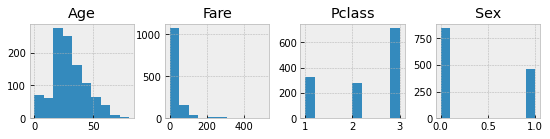

In [ ]:
plt.style.use('bmh')
plt.tight_layout()
df.hist(figsize = (14,4), layout = (2,6))

In [ ]:
empty_entries_per_column = df.isna().sum(axis = 0)
empty_entries_per_column

Pclass      0
Sex         0
Age       263
Fare        1
dtype: int64

In [ ]:
# column Age: fill missing values

# median age for male
mean_male = df[df['Sex'] == 0]['Age'].mean()

# meadian age for female
mean_female = df[df['Sex'] == 1]['Age'].mean()

# print
mean_male, mean_female

# fill NaN in Age column with median_male if male, or median_female if female
df['Age'] = np.where(df['Sex']== 1, df['Age'].fillna(mean_female), df['Age'].fillna(mean_male))

In [ ]:
# column Fare
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [ ]:
empty_entries_per_column = df.isna().sum(axis = 0)
empty_entries_per_column

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
# analysing Fare column x Survived column
ordered = df_original.sort_values(by = 'Fare', ascending = False)[['Fare', 'Survived']]
ordered

,Fare,Survived
258,512.3292,1
737,512.3292,1
679,512.3292,1
88,263.0000,1
27,263.0000,0
...,...,...
633,0.0000,0
413,0.0000,0
822,0.0000,0
732,0.0000,0


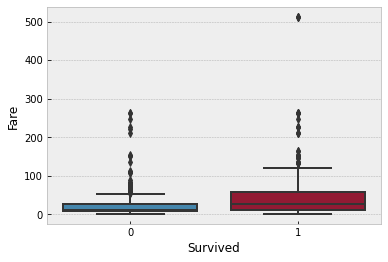

In [ ]:
# plotting Fare column x Survived column
sns.boxplot(ordered['Survived'], ordered['Fare'])

# Features, Target

Previously we concatenated both train and test features to make the changes and transformations apply to all of them. Now we are done with the transformations and we will undo this, since we are going to train the models next.

In [ ]:
df.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [ ]:
# undo concatanation
features = df.iloc[:len(df_original), :]
features

,Pclass,Sex,Age,Fare
0,3,0,22.000000,7.2500
1,1,1,38.000000,71.2833
2,3,1,26.000000,7.9250
3,1,1,35.000000,53.1000
4,3,0,35.000000,8.0500
...,...,...,...,...
886,2,0,27.000000,13.0000
887,1,1,19.000000,30.0000
888,3,1,28.687088,23.4500
889,1,0,26.000000,30.0000


In [ ]:
# undo concatanation
test_features = df.iloc[len(df_original):, :]

In [ ]:
target = df_original['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# concatenate df and target to check new correlations for the transformed dataset

df_transformed = pd.concat([df_original['Survived'], features], axis = 1)
df_transformed.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


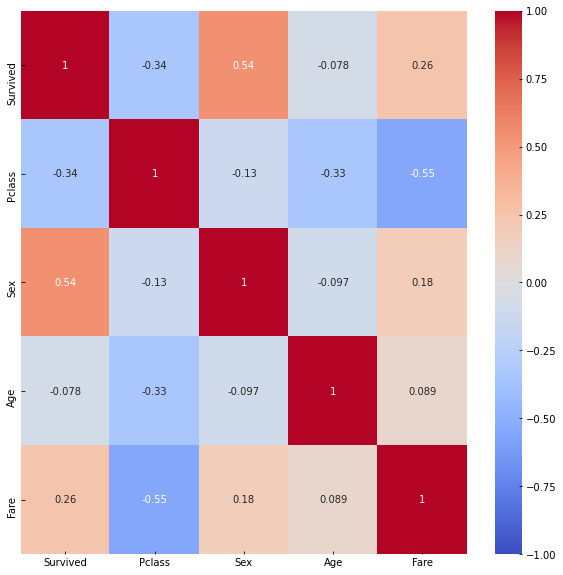

In [ ]:
# correlations to the target seem much better now
corr = df_transformed.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# Balance

We apply the balancing methods:

AFTER we've done the transformations to the combined dataset (so we don't oversample dirty data),

AFTER we have undone the concatenation (so we have clean features (X) and all the targets (y),

and BEFORE the splitting to feed the models (so we split the generated/deleted rows also, increasing/decreasing size of X_train and y_train).

It's not possible to apply the oversampling/undersampling methods before undoing the concatanation of the combined dataset because we don't have the target values for the test data!


SMOTE: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
# Survived count
# 0: died
# 1: survived
df_original.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [ ]:
print("Survived:", df_original[df_original['Survived'] == 1]['PassengerId'].count())
print("Survived:", round(df_original[df_original['Survived'] == 1]['PassengerId'].count()/df_original['PassengerId'].count(), 4), "%")

print("\n\nDied:", df_original[df_original['Survived'] == 0]['PassengerId'].count())
print("Died:", round(df_original[df_original['Survived'] == 0]['PassengerId'].count()/df_original['PassengerId'].count(), 4), "%")

Survived: 342
Survived: 0.3838 %


Died: 549
Died: 0.6162 %


Although the dataset is not really imbalanced, we can try to use some imblearn to see if it gets better.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# 891 rows * 0.8 split = 712 rows
features.shape, target.shape

((891, 4), (891,))

In [ ]:
sm = SMOTE(random_state = 0, sampling_strategy = 'minority')
X_bal, y_bal = sm.fit_resample(features, target)

print('Resampled dataset shape %s' % Counter(target))

Resampled dataset shape Counter({0: 549, 1: 342})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# resampled with SMOTE
X_bal.shape, y_bal.shape

((1098, 4), (1098,))

# Normalization

Better to do it in a Pipeline, when defining the classifier (eg. MLP).

Scaling doesn't affect tree-based models.

# Split

Use X_bal, y_bal to use SMOTE; or
use features, target to disconsider Balance section and SMOTE.

In [ ]:
# stratify?
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.2,
                                                      stratify = y_bal, random_state = 0)

In [ ]:
# Run this cell to train models with the whole dataset
# no split!
X_train = X_bal
y_train = y_bal

# Modeling

In [ ]:
scores = {}

In [ ]:
# Cross Validation
kf = KFold(n_splits=12, random_state=0, shuffle=True)

# Root Mean Squared Error (for Cross Validation Evaluation)
def cv(model):
  score = cross_val_score(model, X_train, y_train, scoring = 'accuracy', n_jobs = -1, cv = kf)
  return score

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs = -1)

score = cv(rf)
print("Random Forest: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Random Forest: 0.8525 (0.0445)


In [ ]:
# fit
rf.fit(X_train, y_train)

# predict on test data
predictions = rf.predict(X_test)

# calculate score 
score = metrics.accuracy_score(y_test, predictions)
test_score_rf = round(score, 4)

print("RFC results for test data:", round(test_score_rf, 4))

# append prediction
scores['RF val'] = test_score_rf

RFC results for test data: 0.9773


In [ ]:
scores

{'RF val': 0.9773}

### RF Optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# define hyper-parameters to optimize
params_rf = {
 "n_estimators"             : [50, 100, 150, 200],
 "min_samples_leaf"         : [1, 2, 3, 4, 5],
 "min_weight_fraction_leaf" : [0.00, 0.05, 0.10, 0.15, 0.20],
 "random_state"             : [0],
 "n_jobs"                   : [-1]
}

In [ ]:
# optimizing rfc (Random Forest Classifier)
random_search_rf = RandomizedSearchCV(RandomForestClassifier(),
                                       param_distributions = params_rf,
                                       scoring = 'accuracy',
                                       n_jobs = -1,
                                       random_state = 0,
                                       cv=10)

random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
# best hyper-parameters
random_search_rf.best_params_

{'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'random_state': 0}

In [ ]:
cv_opt_rf = round(random_search_rf.best_score_, 4)
cv_opt_rf

0.8535

In [ ]:
# optimized rfc
random_search_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# predict on test data
opt_rf = random_search_rf.best_estimator_
predictions_opt = opt_rf.predict(X_test)

# evaluate results
score = metrics.accuracy_score(y_test, predictions_opt)
test_score_opt_rf = round(score, 4)

print("Results for test data: Random Forest Optimized", test_score_opt_rf)

Results for test data: Random Forest Optimized 0.9773


In [ ]:
# append prediction
scores['RF opt val'] = round(score.mean(), 4)

In [ ]:
scores

{'RF opt val': 0.9773, 'RF val': 0.9773}

### RF Report

In [ ]:
print(classification_report(y_test, predictions_opt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       110
           1       0.98      0.97      0.98       110

    accuracy                           0.98       220
   macro avg       0.98      0.98      0.98       220
weighted avg       0.98      0.98      0.98       220



In [ ]:
confusion_matrix(predictions_opt, y_test)

array([[108,   3],
       [  2, 107]])

## SVC

In [ ]:
svc = LinearSVC(random_state=0)

score = cv(svc)
print("SVC: {:.4f} ({:.4f})".format(score.mean(), score.std()))

SVC: 0.6703 (0.1066)


In [ ]:
# fit
svc.fit(X_train, y_train)

# predict on test data
predictions = svc.predict(X_test)

# calculate score 
score = metrics.accuracy_score(y_test, predictions)
test_score_svc = round(score, 4)

print("SVC results for test data:", round(test_score_rf, 4))

# append prediction
scores['SVC val'] = test_score_svc

SVC results for test data: 0.9773


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
scores

{'RF opt val': 0.9773, 'RF val': 0.9773, 'SVC val': 0.6864}

## XGB

Apparently there is a bug when using XGBoost with SciKit learn and DataFrame. It occours while calling the fit or predict method, if XGB is in the final pipeline (voting classifier, in this case).

Solution: just add .values to transform the DataFrame into a ndarray. Just some bug in XGBoost interface/API.

In [ ]:
xgb = XGBClassifier(random_state=0, n_jobs = -1)

score = cv(xgb)
print("XGB: {:.4f} ({:.4f})".format(score.mean(), score.std()))

XGB: 0.8434 (0.0401)


In [ ]:
# fit
xgb.fit(X_train, y_train)

# predict on test data
predictions = xgb.predict(X_test)

# calculate score 
score = metrics.accuracy_score(y_test, predictions)
test_score_xgb = round(score, 4)

print("SVC results for test data:", round(test_score_xgb, 4))

# append prediction
scores['XGB val'] = test_score_xgb

SVC results for test data: 0.8727


In [ ]:
scores

{'RF opt val': 0.9773, 'RF val': 0.9773, 'SVC val': 0.6864, 'XGB val': 0.8727}

## MLP

In [ ]:
np.random.seed(0)
mlp = MLPClassifier(random_state=0)
scaler = StandardScaler()
pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

score = cv(pipe)
print("MLP: {:.4f} ({:.4f})".format(score.mean(), score.std()))

MLP: 0.7951 (0.0438)


In [ ]:
# fit
pipe.fit(X_train, y_train)

# predict on test data
predictions = pipe.predict(X_test)

# calculate score 
score = metrics.accuracy_score(y_test, predictions)
test_score_pipe = round(score, 4)

print("MLP results for test data:", round(test_score_pipe, 4))

# append prediction
scores['MLP val'] = test_score_pipe

MLP results for test data: 0.8409


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
scores

{'MLP val': 0.8409,
 'RF opt val': 0.9773,
 'RF val': 0.9773,
 'SVC val': 0.6864,
 'XGB val': 0.8727}

## Decision Tree

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=0)

score = cv(dt)
print("Decision Tree: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Decision Tree: 0.8270 (0.0431)


In [ ]:
# fit
dt.fit(X_train, y_train)

# predict on test data
predictions = dt.predict(X_test)

# calculate score 
score = metrics.accuracy_score(y_test, predictions)
test_score_dt = round(score, 4)

print("Decision Tree results for test data:", round(test_score_dt, 4))

# append prediction
scores['DT val'] = test_score_dt

Decision Tree results for test data: 0.9727


In [ ]:
scores

{'DT val': 0.9727,
 'MLP val': 0.8409,
 'RF opt val': 0.9773,
 'RF val': 0.9773,
 'SVC val': 0.6864,
 'XGB val': 0.8727}

## Extra Trees

In [ ]:
et = ExtraTreesClassifier(random_state=0, n_jobs = -1)

score = cv(et)
print("Extra Trees: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Extra Trees: 0.8388 (0.0447)


In [ ]:
# fit
et.fit(X_train, y_train)

# predict on test data
predictions = et.predict(X_test)

# calculate score 
score = metrics.accuracy_score(y_test, predictions)
test_score_et = round(score, 4)

print("Extra Trees results for test data:", round(test_score_et, 4))

# append prediction
scores['ET val'] = test_score_et

Extra Trees results for test data: 0.9727


In [ ]:
scores

{'DT val': 0.9727,
 'ET val': 0.9727,
 'MLP val': 0.8409,
 'RF opt val': 0.9773,
 'RF val': 0.9773,
 'SVC val': 0.6864,
 'XGB val': 0.8727}

## GBC

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)

score = cv(gbc)
print("Gradient Boosting: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Gradient Boosting: 0.8470 (0.0323)


In [ ]:
# fit
gbc.fit(X_train, y_train)

# predict on test data
predictions = gbc.predict(X_test)

# calculate score 
score = metrics.accuracy_score(y_test, predictions)
test_score_gbc = round(score, 4)

print("Gradient Boosting results for test data:", round(test_score_gbc, 4))

# append prediction
scores['GBC val'] = test_score_gbc

Gradient Boosting results for test data: 0.8955


In [ ]:
scores

{'DT val': 0.9727,
 'ET val': 0.9727,
 'GBC val': 0.8955,
 'MLP val': 0.8409,
 'RF opt val': 0.9773,
 'RF val': 0.9773,
 'SVC val': 0.6864,
 'XGB val': 0.8727}

## Logistic Regression

Despite the name, it is a classifier!

In [ ]:
log_reg = LogisticRegression(random_state=0)

score = cv(log_reg)
print("Logistic Regression: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Logistic Regression: 0.7914 (0.0463)


In [ ]:
# fit
log_reg.fit(X_train, y_train)

# predict on test data
predictions = log_reg.predict(X_test)

# calculate score 
score = metrics.accuracy_score(y_test, predictions)
test_score_log_reg = round(score, 4)

print("Logistic Regression results for test data:", round(test_score_log_reg, 4))

# append prediction
scores['Log_Reg val'] = test_score_log_reg

Logistic Regression results for test data: 0.7773


In [ ]:
scores

{'DT val': 0.9727,
 'ET val': 0.9727,
 'GBC val': 0.8955,
 'Log_Reg val': 0.7773,
 'MLP val': 0.8409,
 'RF opt val': 0.9773,
 'RF val': 0.9773,
 'SVC val': 0.6864,
 'XGB val': 0.8727}

# Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

In [ ]:
input_shape = len(df.columns)
input_shape

4

## Model

In [ ]:
# Model: define layers
def build_model():
  np.random.seed(0)
  model = Sequential()

  # input layer
  model.add(Dense(256, input_dim = input_shape, activation = 'relu')) 

  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  # 2nd layer: hidden Dense layer
  # this penultimate layer must be activated with softmax or sigmoid
  # since we wnat results in range 0-1
  model.add(Dense(128, activation = 'relu'))

  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  #3rd layer: hidden Dense layer
  model.add(Dense(64, activation = 'softmax'))

  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))

  #4th layer: hidden Dense layer
  model.add(Dense(64))

  # output layer
  model.add(Dense(1))
  # last layer outputs 2 neurons (binary classification) if output is categorical
  # or 1 if output is number
  
  # Define optimizer and learning rate
  optimizer = Adam(lr = 0.001, decay = 0.)
  # optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              # metrics = ['mae', 'mse'],
              metrics = ['accuracy']) # evaluate method
  
  return model

In [ ]:
# Create Model
model_k = build_model()
model_k.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [ ]:
# we can test our model even though we haven't trained it
# just to make sure that it produces results and doesn't blow up.

# since we haven't trained the model, the results are meaningless
# but the shape is right and it didn't throw any errors
example_batch = X_train[:10]
example_result = model_k.predict(example_batch)
example_result

array([[ 0.00914405],
       [ 0.02442849],
       [ 0.01105834],
       [ 0.02537313],
       [ 0.01959129],
       [ 0.01621807],
       [ 0.03327509],
       [ 0.00049806],
       [ 0.01231314],
       [-0.00186512]], dtype=float32)

## Callbacks

PrintDot: Display training progress by printing a single dot for each completed epoch.


ReduceLROnPlateau: Reduces learning rate when a metric has stopped improving: slow cooking.


Early Stopping: Just stop training the model as soon as the model stops improving. Specify metric to look for (val_loss), and how patiece should it be.

In [ ]:
# PrintDot
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
      print('')
    else:
      print('.', end = '')

# ReduceLROnPlateau: learning rate reduction
lrr = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 20,
                                        verbose = 1,
                                        factor = 0.75,
                                        min_lr = 1e-6)


# The patience is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                           patience = 500,
                                           mode = 'max',
                                           verbose = 1,
                                           restore_best_weights = True)

## Fit

In [ ]:
# Define fit neural network hyper-parameters
EPOCHS = 100
BATCH_SIZE = 10

# Train / fit neural network
history = model_k.fit(X_train, y_train,
                    epochs = EPOCHS,
                    validation_split = 0.2,
                    batch_size = BATCH_SIZE,
                    verbose = 0,
                    callbacks = [early_stop, PrintDot(), lrr])


...........................................
Epoch 00044: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
....................
Epoch 00064: ReduceLROnPlateau reducing learning rate to 0.0005625000048894435.
....................
Epoch 00084: ReduceLROnPlateau reducing learning rate to 0.0004218749818392098.
................

In [ ]:
# evaluate method uses the defined metrics
loss, acc = model_k.evaluate(X_test, y_test, verbose = 2)

print("Testing set Accuracy: {:5.4f}".format(acc))
print("Testing set Loss: {:5.2f}".format(loss))

7/7 - 0s - loss: 0.4731 - accuracy: 0.7955
Testing set Accuracy: 0.7955
Testing set Loss:  0.47


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr', 'epoch'], dtype='object')

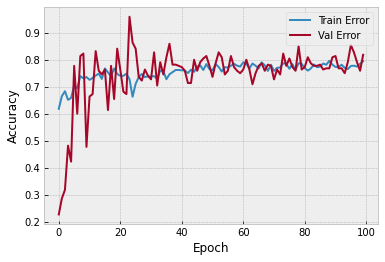

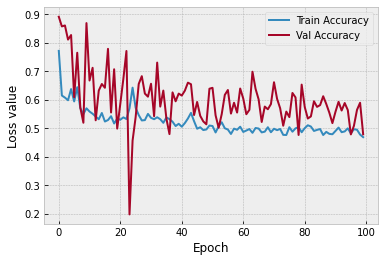

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel("Accuracy")
  plt.plot(hist['epoch'], hist['accuracy'], label = 'Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
  plt.legend()
  #plt.xlim([0, 200])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel("Loss value")
  plt.plot(hist['epoch'], hist['loss'], label = 'Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
  plt.legend()
  #plt.xlim([0, 200])

plot_history(history)

## Predict with Keras

In [ ]:
# predicting X_test
pred_keras = model_k.predict(X_test).flatten()
pred_keras

array([0.41511083, 0.5820292 , 0.1280983 , 0.42810076, 0.1337607 ,
       0.11384271, 0.14998205, 0.9431655 , 0.13068137, 0.50976694,
       0.13419566, 0.11288233, 0.68364507, 0.96195436, 0.26674563,
       0.13719931, 0.962188  , 0.13579875, 0.13336904, 0.67961496,
       0.7394552 , 0.9608597 , 0.67987335, 0.13524416, 0.8359062 ,
       0.20246145, 0.9028041 , 0.11258678, 0.6814707 , 0.9617072 ,
       0.68155676, 0.54878885, 0.17455818, 0.65066147, 0.93716913,
       0.24397098, 0.13459423, 0.6799762 , 0.29052067, 0.15263486,
       0.7195607 , 0.13433047, 0.67047787, 0.6798505 , 0.1336653 ,
       0.12464055, 0.80492115, 0.4271428 , 0.16782409, 0.95509094,
       0.13442817, 0.2921297 , 0.11400517, 0.11761226, 0.13406837,
       0.12994282, 0.6817201 , 0.1305295 , 0.13321823, 0.95956975,
       0.6814707 , 0.27329415, 0.25849563, 0.6503967 , 0.71636105,
       0.1333373 , 0.7893702 , 0.1782744 , 0.6796905 , 0.13527429,
       0.4250856 , 0.6201328 , 0.8619023 , 0.8459533 , 0.24468

In [ ]:
pred_keras[pred_keras >= 0.5] = 1
pred_keras[pred_keras < 0.5] = 0

In [ ]:
pred_keras = pred_keras.astype(int)

In [ ]:
pred_keras

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
# calculate score 
score = metrics.accuracy_score(y_test, pred_keras)
test_score_keras = round(score, 4)

print("Keras Classification results for test data:", round(test_score_keras, 4))

# append prediction
scores['Keras val'] = test_score_keras

Keras Classification results for test data: 0.7955


In [ ]:
# predicting for submission
pred_keras = model_k.predict(test_features).flatten()

pred_keras[pred_keras >= 0.5] = 1
pred_keras[pred_keras < 0.5] = 0

pred_keras = pred_keras.astype(int)

pred_keras

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Stacking

Stacking Classifier documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

"Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator."

In [ ]:
# Stack up all the models above, optimized using xgboost


# estimators = [('rf', rf),
#               ('opt_rf', opt_rf),
#               ('svc', svc),
#               ('xgb', xgb),
#               ('gbc', gbc)]


# stack = StackingClassifier(estimators = estimators,
#                            final_estimator = xgb,
#                            cv = 10,             
#                            n_jobs = -1,
#                            verbose = 0)

# stack.fit(X_train, y_train)

In [ ]:
# predictions = stack.predict(X_test)

# # calculate score 
# score = metrics.accuracy_score(y_test, predictions)
# test_score_stack = round(score, 4)

# print("Stacking results for test data:", round(test_score_stack, 4))

# # append prediction
# scores['Stacking val'] = test_score_stack

# Ensemble

Voting classifiers: majority vote or soft vote.

Using all classifiers: stacking, ensemble/voting or boosting.

Using all regressors: stacking/blending.

In classification it's not good practice to use blended models. There is no sense in averaging the predictions of different classifiers, since we want the output to be in range 0-1. 

This is why it's prefered to use a voting classifier system instead of a blending. We can use a majority vote (hard vote) or the average predicted probabilities (soft vote) to predict the class labels.

https://scikit-learn.org/stable/modules/ensemble.html

In [ ]:
scores

{'DT val': 0.9727,
 'ET val': 0.9727,
 'GBC val': 0.8955,
 'Keras val': 0.7955,
 'Log_Reg val': 0.7773,
 'MLP val': 0.8409,
 'RF opt val': 0.9773,
 'RF val': 0.9773,
 'SVC val': 0.6864,
 'XGB val': 0.8727}

In [ ]:
estimators = [('rf', rf),
              ('opt_rf', opt_rf),
              ('xgb', xgb),
              ('gbc', gbc)]

voting = VotingClassifier(estimators = estimators,
                 voting='soft')

# Cross Validation scores
for clf, label in zip([rf, opt_rf, xgb, gbc, voting], ['rf', 'optm_rf', 'xgb', 'gbc', 'Ensemble']):
  score = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv = 5, verbose = 0)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (score.mean(), score.std(), label))

Accuracy: 0.85 (+/- 0.05) [rf]
Accuracy: 0.85 (+/- 0.05) [optm_rf]
Accuracy: 0.84 (+/- 0.05) [xgb]
Accuracy: 0.84 (+/- 0.06) [gbc]
Accuracy: 0.86 (+/- 0.06) [Ensemble]


In [ ]:
# fit
voting.fit(X_train, y_train)

# predict on test data
predictions = voting.predict(X_test)

# calculate score 
score = metrics.accuracy_score(y_test, predictions)
test_score_voting = round(score, 4)

print("Voting/Ensemble results for test data:", round(test_score_voting, 4))

# append prediction
scores['Ensemble val'] = test_score_voting

Voting/Ensemble results for test data: 0.95


In [ ]:
scores

{'DT val': 0.9727,
 'ET val': 0.9727,
 'Ensemble val': 0.95,
 'GBC val': 0.8955,
 'Keras val': 0.7955,
 'Log_Reg val': 0.7773,
 'MLP val': 0.8409,
 'RF opt val': 0.9773,
 'RF val': 0.9773,
 'SVC val': 0.6864,
 'XGB val': 0.8727}

## Ensemble Report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       110
           1       0.96      0.94      0.95       110

    accuracy                           0.95       220
   macro avg       0.95      0.95      0.95       220
weighted avg       0.95      0.95      0.95       220



In [ ]:
confusion_matrix(predictions, y_test)

array([[106,   7],
       [  4, 103]])

# Accuracy Plot

Plot only predicted values (results on test data: y_test). Don't plot CV (Cross Validation scores), just validation accuracies.

In [ ]:
scores

{'DT val': 0.9727,
 'ET val': 0.9727,
 'Ensemble val': 0.95,
 'GBC val': 0.8955,
 'Keras val': 0.7955,
 'Log_Reg val': 0.7773,
 'MLP val': 0.8409,
 'RF opt val': 0.9773,
 'RF val': 0.9773,
 'SVC val': 0.6864,
 'XGB val': 0.8727}

In [ ]:
scores.keys()

dict_keys(['RF val', 'RF opt val', 'SVC val', 'XGB val', 'MLP val', 'DT val', 'ET val', 'GBC val', 'Log_Reg val', 'Keras val', 'Ensemble val'])

In [ ]:
scores.values()

dict_values([0.9773, 0.9773, 0.6864, 0.8727, 0.8409, 0.9727, 0.9727, 0.8955, 0.7773, 0.7955, 0.95])

In [ ]:
list(scores.values())

[0.9773,
 0.9773,
 0.6864,
 0.8727,
 0.8409,
 0.9727,
 0.9727,
 0.8955,
 0.7773,
 0.7955,
 0.95]

In [ ]:
np.array(list(scores.values()))

array([0.9773, 0.9773, 0.6864, 0.8727, 0.8409, 0.9727, 0.9727, 0.8955,
       0.7773, 0.7955, 0.95  ])

In [ ]:
# transforming dictionary to array so we can plot it
models = np.array(list(scores.keys()))
values = np.array(list(scores.values()))

In [ ]:
# indices ordered from higher to lower score
argsort = np.argsort(values)
argsort

array([ 2,  8,  9,  4,  3,  7, 10,  5,  6,  0,  1])

In [ ]:
# ordering: crating sorted arrays to plot
values_sorted = values[argsort]
models_sorted = models[argsort]

## Plot

<Figure size 720x432 with 0 Axes>

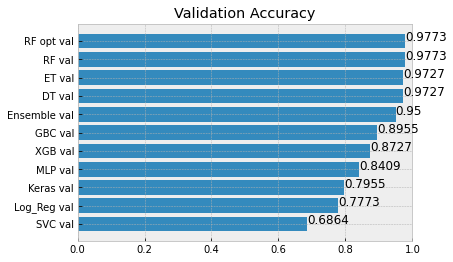

In [ ]:
# plot accuracies
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.barh(models_sorted, values_sorted)
plt.xlim(0,1)
plt.title("Validation Accuracy")
for index, value in enumerate(values_sorted):
    plt.text(value, index, str(round(value, 4)), fontsize = 12)

# Submission to Kaggle

In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_features

,Pclass,Sex,Age,Fare
891,3,0,34.500000,7.8292
892,3,1,47.000000,7.0000
893,2,0,62.000000,9.6875
894,3,0,27.000000,8.6625
895,3,1,22.000000,12.2875
...,...,...,...,...
1304,3,0,30.585228,8.0500
1305,1,1,39.000000,108.9000
1306,3,0,38.500000,7.2500
1307,3,0,30.585228,8.0500


In [ ]:
empty_entries_per_column = test_features.isna().sum(axis = 0)
empty_entries_per_column

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
empty_entries_per_column = test_features.isna().sum(axis = 0)
empty_entries_per_column

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
test_features

,Pclass,Sex,Age,Fare
891,3,0,34.500000,7.8292
892,3,1,47.000000,7.0000
893,2,0,62.000000,9.6875
894,3,0,27.000000,8.6625
895,3,1,22.000000,12.2875
...,...,...,...,...
1304,3,0,30.585228,8.0500
1305,1,1,39.000000,108.9000
1306,3,0,38.500000,7.2500
1307,3,0,30.585228,8.0500


## Final Predictions

Apparently there is a bug when using XGBoost with SciKit learn and DataFrame. It occours while calling the fit or predict method, if XGB is in the final pipeline (voting classifier, in this case).

Solution: just add .values to transform the DataFrame into a ndarray. Just some bug in XGBoost interface/API.

In [ ]:
final_pred = voting.predict(test_features.values)
final_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# # only keras
# submission = pd.DataFrame({
#             "PassengerId" : df_test['PassengerId'],
#             "Survived" : pred_keras
#             })

# submission.head()

In [ ]:
# submission.dtypes

In [ ]:
submission = pd.DataFrame({
            "PassengerId" : df_test['PassengerId'],
            "Survived" : final_pred
            })

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submission.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [ ]:
submission.shape

(418, 2)

In [ ]:
filename = 'Titanic_Survival.csv'
submission.to_csv(filename, index=False)
# goes to colab environment / working directory:   /content

# Possible improvements

1. Feature Engineering, Label Enconde Cabin, Embark...
2. Stacking
3. GaussianNB, KNN, LightGBM...
4. Scale SVC
5. scikit optimize (all models)
6. other ensemble methods